In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import acquire

In [2]:
df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


Lets start with sumarizing the info that we have

- df.head()
- df.info()
- df.describe()
- df.isna().sum()
- df[col].hist()
- df[col].dtypes
- df[col].value_counts()

goals:
- get an idea of the spread of info on each feature
- identitfy where null values are
- identify redundancys
- Identify any categorical variables that require encoding
- Identify any column names that need adjusting
- Identify features that appear especially skewed for note in analysis
- TLDR Get the info we need to proceed with cleaning and analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [11]:
# use a boolean mask along with our function to get a list of nulls
df.isna().sum()[df.isna().sum() > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [12]:
# find the proportion of how many nulls are in the column in order to figure out
# what to do with the data
df.isna().sum()[df.isna().sum() > 0] / len(df)


age            0.198653
embarked       0.002245
deck           0.772166
embark_town    0.002245
dtype: float64

In [13]:
# conclusions:
# 77% of deck data is missing, this is probably not going to be useful data

# embark and embark_town have the same amount of missing values, probably the same info

# age is about 20% missing, do we drop it? or do we keep it? judgement call, 
# it could be useful along the line, 
# but for the sake of a minimum viable product we may drop it
# we could investigate further in order to see if the info we have might be useful

In [15]:
# df['embark_town'].dropna()
# this could cause an error in the data so instead we use

# this will check to see if embark_town is actually the same info as embark
# by checking to see if the missing values are the same
(df['embarked'].dropna() == 
 df['embark_town'].dropna().apply(lambda x: x[0])).mean()

1.0

In [16]:
#since embarked and embarked_town are the same thing 
# we will keep embark_town since it is more descriptive

In [18]:
# imbutation
# fill in the most common value in embark_town for the nulls:

In [22]:
df.embark_town.value_counts(dropna=False)
# using dropna=False will also show us the nulls

Southampton    644
Cherbourg      168
Queenstown      77
None             2
Name: embark_town, dtype: int64

In [23]:
df.embark_town.fillna('Southampton', inplace=True)
# this will not print anything when running

In [24]:
df.embark_town.value_counts(dropna=False)

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [25]:
# drop the embarked column since it is redunant
df = df.drop(columns='embarked')

In [26]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,Third,None,Southampton,1


In [ ]:
# note that the passenger_id is a repeat of the index
# this needs to be dropped or set as index in order to not have errors when we
# use the data with a ML model

In [ ]:
# class and pclass appears to have the same info as well, 
# pclass is a number, but class is writen out in text
# we will want to to keep the number instead of the text since this will work better
# with any ML analysis

In [29]:
df['sex'].dtype == 'O'

True

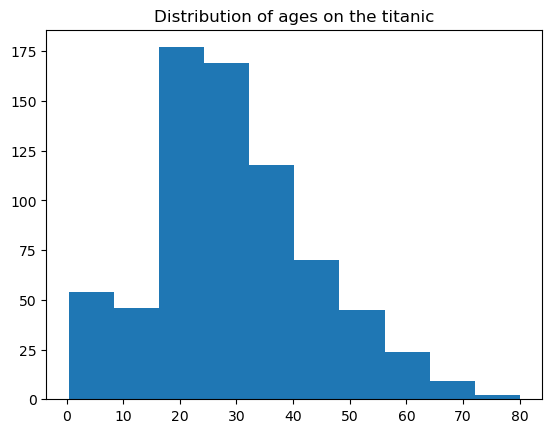

In [30]:
plt.hist([df['age']])
plt.title('Distribution of ages on the titanic')
plt.show()

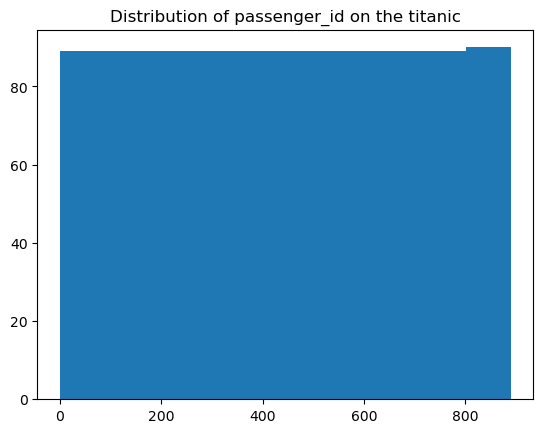

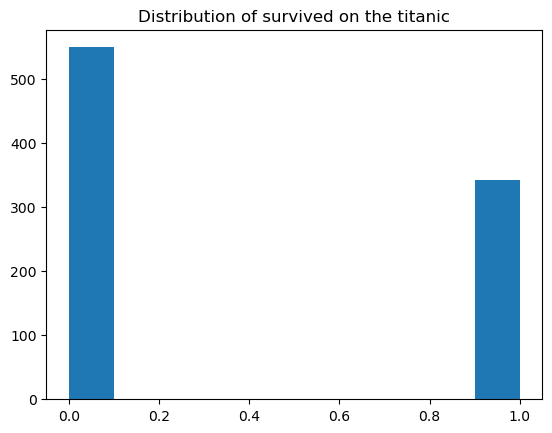

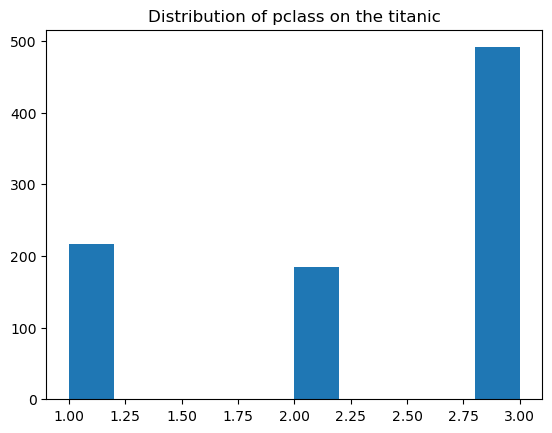

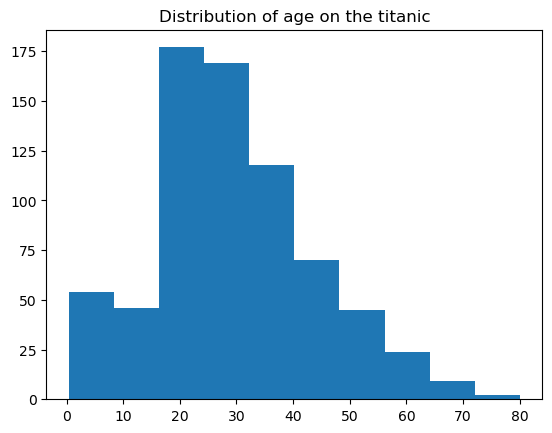

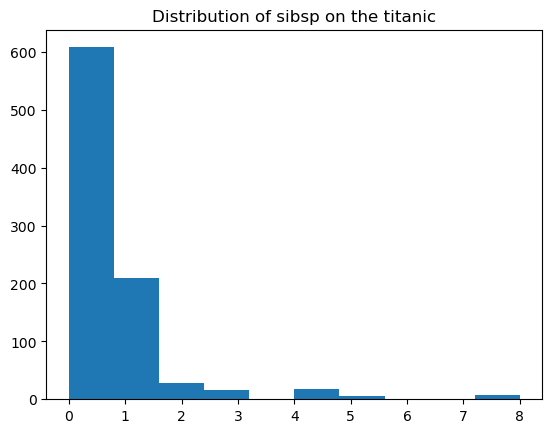

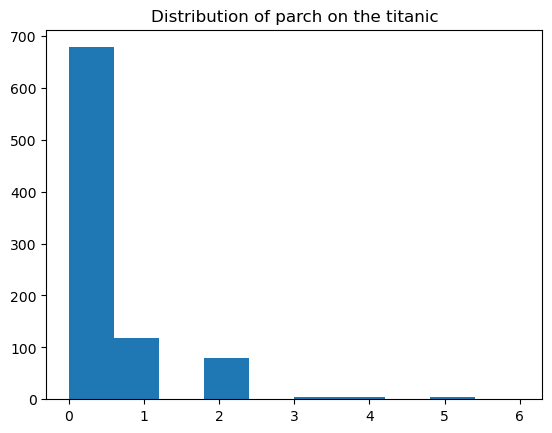

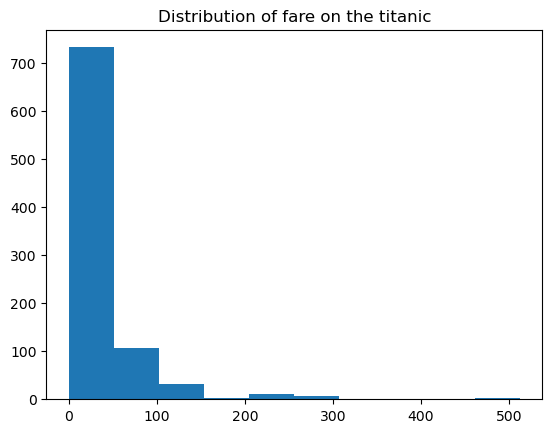

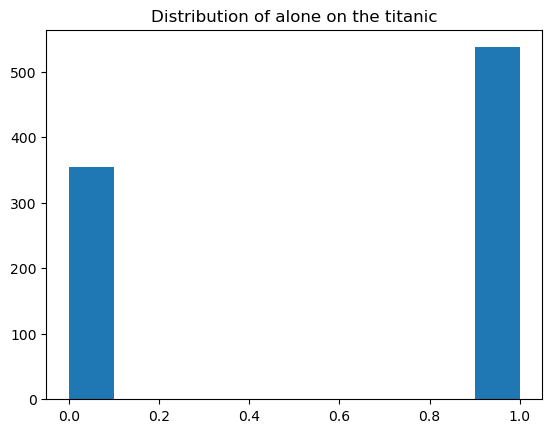

In [36]:
# for every column in df, check if the dtype is an object, if not then 
# give me a hist of the column
for col in df:
    if df[col].dtype != 'O':
        plt.hist(df[col])
        plt.title(f'Distribution of {col} on the titanic')
        plt.show()

what do we still need to do?
- drop calss, passenger_id, fill age with avg age, drop deck

In [39]:
df.groupby('pclass').deck.value_counts(dropna=False)

pclass  deck
1       C        59
        B        47
        NaN      41
        D        29
        E        25
        A        15
2       NaN     168
        F         8
        D         4
        E         4
3       NaN     479
        F         5
        G         4
        E         3
Name: deck, dtype: int64

In [38]:
df.groupby('pclass').deck.value_counts(dropna=False, normalize = True)

pclass  deck
1       C       0.273148
        B       0.217593
        NaN     0.189815
        D       0.134259
        E       0.115741
        A       0.069444
2       NaN     0.913043
        F       0.043478
        D       0.021739
        E       0.021739
3       NaN     0.975560
        F       0.010183
        G       0.008147
        E       0.006110
Name: deck, dtype: float64

In [40]:
df = df.drop(columns=['embarked','class', 'deck', 'passenger_id'])

In [41]:
# this will fill our null ages with the mean age
df['age'] = df['age'].fillna(df.age.mean())

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embark_town  891 non-null    object 
 8   alone        891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
alone,891.0,0.602694,0.489615,0.00,0.0000,1.000000,1.0,1.0000


In [45]:
df.fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

In [46]:
# why is the decimal so granular on fare, when it should be a dollar amount?
# this is a weird thing, which is great for Anomaly Detection ML

In [48]:
# introducing pd.get_dummies()
# welcome to one-hot-encoding
df.embark_town.value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [49]:
pd.get_dummies(df['embark_town'])

,Cherbourg,Queenstown,Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [50]:
pd.get_dummies(df['embark_town'], drop_first=True)
# drop_first will drop the first column, since if we know 2 out of 3, 
# we can figure out the third
# or if we know n-1 we can figure out the last column
# this makes the info just slightly easier to compute

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [52]:
# to add multiple new columns to the df 
pd.concat(
    [df,
     pd.get_dummies(df['embark_town'], drop_first=True)],
    axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,Queenstown,Southampton
0,0,3,male,22.000000,1,0,7.2500,Southampton,0,0,1
1,1,1,female,38.000000,1,0,71.2833,Cherbourg,0,0,0
2,1,3,female,26.000000,0,0,7.9250,Southampton,1,0,1
3,1,1,female,35.000000,1,0,53.1000,Southampton,0,0,1
4,0,3,male,35.000000,0,0,8.0500,Southampton,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Southampton,1,0,1
887,1,1,female,19.000000,0,0,30.0000,Southampton,1,0,1
888,0,3,female,29.699118,1,2,23.4500,Southampton,0,0,1
889,1,1,male,26.000000,0,0,30.0000,Cherbourg,1,0,0


In [53]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1


In [54]:
# we can pass in multiple columns into the get_dummies by using double brackets
pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [55]:
# then to save the columns to the df
df = pd.concat([
    df,
    pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)],
    axis=1)

In [56]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Southampton,1,1,0,1


In [ ]:
# next the functions to do multiple things with one command
# cleaned_titanic = clean_titanic(get_titanic_data())

In [68]:
def clean_titanic(df):
    '''
    clean titanic will take in titanic data and clean the columns
    '''
    # drop out redundant, empty and bad columns
    df = df.drop(columns=['passenger_id','embarked','deck','class'])
    
    #impute avg age and most common embark-town
    df['age'] = df['age'].fillna(df.age.mean())
    df['embark_town'] = df['embark_town'].fillna('Southampton')
    
    # encode categorical values:
    df = pd.concat([
    df,
    pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)],
    axis=1)
    
    return df

In [69]:
clean_titanic(acquire.get_titanic_data())

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.000000,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,38.000000,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,26.000000,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,35.000000,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,35.000000,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Southampton,1,1,0,1
887,1,1,female,19.000000,0,0,30.0000,Southampton,1,0,0,1
888,0,3,female,29.699118,1,2,23.4500,Southampton,0,0,0,1
889,1,1,male,26.000000,0,0,30.0000,Cherbourg,1,1,0,0


In [71]:
# time to split the data for ML
from sklearn.model_selection import train_test_split

In [72]:
# split our df into train_val and test:
# split out train_val into train and validate:
# there is no *real number that needs to represtnt the train test proportions
# the best base value is goin to be an 80/20 split
# in cases where you have an excess of data, you can get away with
# allocating mor for your data for test and vice versa if you are limited
train_val, test = train_test_split(df, 
                                   train_size=0.8, 
                                   random_state=1349,
                                  stratify=df['survived'])

In [73]:
train_val.shape, test.shape

((712, 12), (179, 12))

In [74]:
train, validate = train_test_split(train_val,
                                  train_size=0.7,
                                  random_state=1349,
                                  stratify=train_val['survived']) #need to use the train_val

In [75]:
train.shape[0] + validate.shape[0] + test.shape[0] == df.shape[0]

True

In [76]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
474,0,3,female,22.000000,0,0,9.8375,Southampton,1,0,0,1
370,1,1,male,25.000000,1,0,55.4417,Cherbourg,0,1,0,0
573,1,3,female,29.699118,0,0,7.7500,Queenstown,1,0,1,0
110,0,1,male,47.000000,0,0,52.0000,Southampton,1,1,0,1
167,0,3,female,45.000000,1,4,27.9000,Southampton,0,0,0,1


In [80]:
def split_titanic_data(df, target='survived'):
    '''
    this will split the cleaned titanic data into train, validate and test groups
    '''
    train_val, test = train_test_split(df, 
                                   train_size=0.8, 
                                   random_state=1349,
                                  stratify=df[target])
    train, validate = train_test_split(train_val,
                                  train_size=0.7,
                                  random_state=1349,
                                  stratify=train_val[target])
    return train, validate, test

In [81]:
def prep_titanic(df):
    df = clean_titanic(df)
    return split_titanic_data(df)

In [82]:
prep_titanic(acquire.get_titanic_data())

(     survived  pclass     sex        age  sibsp  parch     fare  embark_town  \
 474         0       3  female  22.000000      0      0   9.8375  Southampton   
 370         1       1    male  25.000000      1      0  55.4417    Cherbourg   
 573         1       3  female  29.699118      0      0   7.7500   Queenstown   
 110         0       1    male  47.000000      0      0  52.0000  Southampton   
 167         0       3  female  45.000000      1      4  27.9000  Southampton   
 ..        ...     ...     ...        ...    ...    ...      ...          ...   
 735         0       3    male  28.500000      0      0  16.1000  Southampton   
 163         0       3    male  17.000000      0      0   8.6625  Southampton   
 770         0       3    male  24.000000      0      0   9.5000  Southampton   
 196         0       3    male  29.699118      0      0   7.7500   Queenstown   
 94          0       3    male  59.000000      0      0   7.2500  Southampton   
 
      alone  sex_male  emb